> 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import torch 

# Tensors
Torch use tensors to represent data in a very efficent way, you can perfom several mathematical operations efficiently and fast

In [2]:
#we create some random input data
inputs=torch.randn(1,5)
print(inputs,"\n",inputs.shape)

tensor([[ 0.6659, -0.1488,  1.7867, -0.8349, -1.0236]]) 
 torch.Size([1, 5])


We can build neural networks perfoming the corresponding mathematical operations between tensors for example let's say we want to create a single layer network with 3 hidden units (neurons) and 4 inputs so
in this case our inputs X should be multiplied by the weight matrix W of the layer 
$$
\begin{equation*}
{X} \times {W}= \begin{bmatrix}
\mathbf{x}_1 & \mathbf{x}_2 & \mathbf{x}_3 & \mathbf{x}_4\\
\end{bmatrix}
\times
\begin{vmatrix}
\mathbf{h}_1 & \mathbf{h}_2 & \mathbf{h}_3 \\
{w}_{11}&{w}_{21}&{w}_{31}\\
{w}_{12}&{w}_{22}&{w}_{32}\\
{w}_{13}&{w}_{23}&{w}_{33}\\
{w}_{14}&{w}_{24}&{w}_{34}
\end{vmatrix}
\end{equation*}
$$
Where each column of W represent the 4 weights of a hidden unit $$h_{1-3}$$ corresponding to each input $$x_{1-4}$$ 

W will have as many columns as neurons and as many rows as inputs,we are performing the dot product of each column and the inputs to get a score for each neuron,those scores will be stored in a hidden vector h

then we will sum the bias to the hidden state vector h = X * W 
$$
\begin{bmatrix}
\mathbf{h}_1 & \mathbf{h}_2 & \mathbf{h}_3 \\
\end{bmatrix}
+
\begin{bmatrix}
\mathbf{b}_1 & \mathbf{b}_2 & \mathbf{b}_3 \\
\end{bmatrix}
$$
at the end our network will be 
$$
\mathbf{Y}_{prediction}=W\times X + b
$$



Implementing the basic dense layer

In [3]:
def no_activation(x):
    return x

In [4]:
def sigmoid(x):
    return 1/(1+torch.exp(x))

In [5]:

class dense():
    def __init__(self,input_d,units):
        self.weights=torch.randn((input_d,units))
        self.bias=torch.randn((1,units))
    def __call__(self,inputs,activation=no_activation):
        return activation(torch.mm(inputs,self.weights)+self.bias)

Creating a simple model using 1 hidden layer with two neurons and and output layer with one neuron 

In [6]:
class model():
    def __init__(self,input_d):
        self.layer1=dense(input_d,2)
        self.layer2=dense(self.layer1.weights.shape[1],1)
    def __call__(self,inputs):
        h1= self.layer1(inputs,activation=sigmoid)
        h2= self.layer2(h1,activation=sigmoid)
        return h2

In [7]:

torch.manual_seed(7)
features = torch.randn((1, 3))
firstnet=model(features.shape[1])
firstnet(features)

tensor([[0.3988]])

we can create tensors from numpy arrays 

In [8]:
a=np.random.rand(4,3)
a

array([[0.59920956, 0.89934388, 0.04766251],
       [0.01961784, 0.88963801, 0.81501703],
       [0.2569953 , 0.24056583, 0.68124373],
       [0.12163555, 0.63924961, 0.55697088]])

in this case the new tensor will share mamoery whit the numpy array so wherever change we made in any of them will affect each other

In [9]:
b=torch.from_numpy(a)
b

tensor([[0.5992, 0.8993, 0.0477],
        [0.0196, 0.8896, 0.8150],
        [0.2570, 0.2406, 0.6812],
        [0.1216, 0.6392, 0.5570]], dtype=torch.float64)

In [10]:
b.mul_(2)

tensor([[1.1984, 1.7987, 0.0953],
        [0.0392, 1.7793, 1.6300],
        [0.5140, 0.4811, 1.3625],
        [0.2433, 1.2785, 1.1139]], dtype=torch.float64)

In [11]:
a

array([[1.19841911, 1.79868775, 0.09532502],
       [0.03923568, 1.77927603, 1.63003407],
       [0.5139906 , 0.48113167, 1.36248746],
       [0.24327109, 1.27849922, 1.11394176]])

We can also create new tensor from numpy arrays without sharing memory between them, so this new tensor will have its own memory, and the changes on it will not affect the numpy array

In [12]:
b_nosharedmemory = torch.Tensor(a)

In [13]:
b_nosharedmemory

tensor([[1.1984, 1.7987, 0.0953],
        [0.0392, 1.7793, 1.6300],
        [0.5140, 0.4811, 1.3625],
        [0.2433, 1.2785, 1.1139]])

In [14]:
b_nosharedmemory.mul_(2)

tensor([[2.3968, 3.5974, 0.1907],
        [0.0785, 3.5586, 3.2601],
        [1.0280, 0.9623, 2.7250],
        [0.4865, 2.5570, 2.2279]])

In [15]:
a

array([[1.19841911, 1.79868775, 0.09532502],
       [0.03923568, 1.77927603, 1.63003407],
       [0.5139906 , 0.48113167, 1.36248746],
       [0.24327109, 1.27849922, 1.11394176]])

In [16]:
b_nosharedmemory

tensor([[2.3968, 3.5974, 0.1907],
        [0.0785, 3.5586, 3.2601],
        [1.0280, 0.9623, 2.7250],
        [0.4865, 2.5570, 2.2279]])

Lets create a neural net two solve the mnist from of predict the number appearing on an image

We defined a transform to normalize the data , we are going to tranform each image to a vectorand also normalize it in a range of [-1,1] (standart normal distribution) image = (image - mean) / std the function normalize recieves two parameters mean and std in our case mean=0.5 and std=0.5 this normalization provides a better workfield to gradient descent since in the end we want to capture the distribution of the data its easier to capture a normal distribution 0 mean and equal variance

In [17]:
from torchvision import datasets,transforms



transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
# Download and load the data
data= datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)


  0%|          | 0/9912422 [00:00<?, ?it/s]

9920512it [00:00, 19909729.90it/s]                            


Extracting /tmp/.pytorch/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz


32768it [00:00, 327987.63it/s]
0it [00:00, ?it/s]

Extracting /tmp/.pytorch/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:00, 5412011.91it/s]                           
8192it [00:00, 132611.37it/s]


Extracting /tmp/.pytorch/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz
Extracting /tmp/.pytorch/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [18]:
#this dataloader will split the data in batches of 64 samples and will shuffle them 
dataloader = torch.utils.data.DataLoader(data, batch_size=64, shuffle=True)



As we can see the data loader iterates giving us a batch of 64  images  each time

In [19]:
dataiter = iter(dataloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


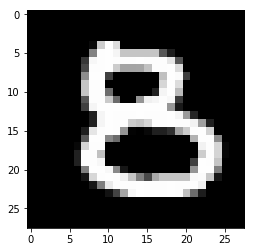

In [20]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

[](http://)

we will apply exp to all the elements in our data, then we know each row of our data is a prediction, so we should sum by rows (in dim=1) and also in order to divide 10 values by 10 values we should transpose that summaroty of the rows two divide the the row by a value 

In [21]:
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1, 1)

In [22]:
class model(object):
    def __init__(self,input_d):
        self.layer1=dense(input_d,256)
        self.outputlayer=dense(self.layer1.weights.shape[1],10)
    def __call__(self,inputs):
        h1=self.layer1(inputs,activation=sigmoid)
        out=self.outputlayer(h1,activation=softmax)
        return out

In [23]:
inputs = images.view(images.shape[0], -1)
inputs.shape

torch.Size([64, 784])

In [24]:
mnist_net=model(inputs.shape[1])
outputs=mnist_net(inputs)

In [25]:
print(outputs.shape)
print(torch.sum(outputs,dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


Using the nn module to create models

In [26]:
import torch.nn as nn
class model(torch.nn.Module):
    def __init__(self,input_d):
        super().__init__()
        self.layer1=nn.Linear(784,256)
        self.out_Layer=nn.Linear(256,10)
    def __call__(self,inputs):
        h1=torch.sigmoid(self.layer1(inputs))
        out=torch.softmax(self.out_Layer(h1),dim=1) #we will calculate the softamx by row 
        return out
    

In [27]:
torchmodel=model(inputs.shape[1])
torchmodel

model(
  (layer1): Linear(in_features=784, out_features=256, bias=True)
  (out_Layer): Linear(in_features=256, out_features=10, bias=True)
)

In [28]:
outputs=torchmodel(inputs)
outputs.shape

torch.Size([64, 10])

In [29]:
torch.sum(outputs,dim=1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000], grad_fn=<SumBackward2>)

Lets build a more complex architecture also using other activation functions such as ReLU

In [30]:
import torch.nn.functional as F
class Model(torch.nn.Module):
    def __init__(self,input_d):
        super().__init__()
        self.layer1=nn.Linear(input_d,128)
        self.layer2=nn.Linear(self.layer1.out_features,64)
        self.out_layer=nn.Linear(self.layer2.out_features,10)
    def __call__(self,inputs):
        h1=F.relu(self.layer1(inputs))
        h2=F.relu(self.layer2(h1))
        out=torch.softmax(self.out_layer(h2),dim=1)
        return out
        
        
    

In [31]:
relumodel=Model(inputs.shape[1])
relumodel

Model(
  (layer1): Linear(in_features=784, out_features=128, bias=True)
  (layer2): Linear(in_features=128, out_features=64, bias=True)
  (out_layer): Linear(in_features=64, out_features=10, bias=True)
)

In [32]:
torch.sum(relumodel(inputs),dim=1)


tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000], grad_fn=<SumBackward2>)

Let's build a model and calculate the loss noticed that we calculate the loss with the output scores and not whit the probabilities coming from the activation function (softmax)

In [33]:

# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10))

# Define the loss
criterion = nn.CrossEntropyLoss()

# Get our data
images, labels = next(iter(dataloader))
# Flatten images
images = images.view(images.shape[0], -1)

# Forward pass, get our logits
logits = model(images)
# Calculate the loss with the logits and the labels
loss = criterion(logits, labels)

print(loss)

tensor(2.3237, grad_fn=<NllLossBackward>)


 it's more convenient to build the model with a log-softmax output ,then you can get the actual probabilities by taking the exponential torch.exp(output). With a log-softmax output, we should use  to use the negative log likelihood loss
 
 
The softmax function returns probabilities between [0, 1].
The log of these probabilities returns values between [-inf, 0], since log(0) = -inf and log(1) = 0.
That is why the order won’t change.

However, you should use the NLLLoss with a log_softmax output
or CrossEntropyLoss with logits if you prefer not to add an extra log_softmax layer into your model.

In [34]:

# TODO: Build a feed-forward network
model = nn.Sequential(nn.Linear(images.shape[1],250),
                      nn.ReLU(),
                      nn.Linear(250,120),
                      nn.ReLU(),
                      nn.Linear(120,10),
                      nn.LogSoftmax(dim=1) 
                      #because we want to softmax by row (each row contains the score of a input), 
                      #we have 64 rows because our batch is of 64 samples
                      )

# TODO: Define the loss
criterion = nn.NLLLoss()


# Forward pass, get our logits
logits = model(images)
print(logits.shape)
print(torch.sum(torch.exp(logits),dim=1))
# Calculate the loss with the logits and the labels
loss = criterion(logits, labels)

print(loss)

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000], grad_fn=<SumBackward2>)
tensor(2.2840, grad_fn=<NllLossBackward>)


![](http://)

In [35]:
images.shape

torch.Size([64, 784])

Autograd

Autograd allow us to track the operations done on a tensor and when you tell it to do a backward pass , it will go backwards  trought  each of these operations and calculate the gradients whit resect to the input parameters 

In torch you need to indicate that you require to calculate the gradients of a tensor

In [36]:
tensor=torch.randn(2,2,requires_grad=True)
tensor

tensor([[-0.6817,  0.7923],
        [ 0.3231, -0.9885]], requires_grad=True)

You also can turn the grads of and turn in on again on a tensor

In [37]:
tensor.requires_grad=False
print("grads off:\n",tensor)
tensor.requires_grad=True
print("grads on:\n",tensor)

grads off:
 tensor([[-0.6817,  0.7923],
        [ 0.3231, -0.9885]])
grads on:
 tensor([[-0.6817,  0.7923],
        [ 0.3231, -0.9885]], requires_grad=True)


you can also use contexts to control the grads tracking

In [38]:
with torch.no_grad():
    y=tensor**2
y.requires_grad

False

In [39]:
print(tensor)
with torch.no_grad():
    tensor=tensor**2
print(tensor)
tensor.requires_grad=True

tensor([[-0.6817,  0.7923],
        [ 0.3231, -0.9885]], requires_grad=True)
tensor([[0.4647, 0.6278],
        [0.1044, 0.9771]])


in this case we see the torch wil track the operations in the tensor since we stablish requieres_grad as True
we can also globally enable or disable grads globally using 
```python
torch.set_grad_enabled(True|false)
```

In [40]:
tensor=torch.sqrt(tensor)
tensor

tensor([[0.6817, 0.7923],
        [0.3231, 0.9885]], grad_fn=<SqrtBackward>)

then let's say we have a function 
$$
y=x^2
$$

and also
$$
z = \left[\frac{1}{n}\sum_i^n y_i\right]
$$

so then we want to calculate the gradients of z with respect x

$$
\frac{\partial z}{\partial x} = \frac{\partial}{\partial x}\left[\frac{1}{n}\sum_i^n x_i^2\right] = \frac{x}{2}
$$

we can easily perfom this with autograd in pytorch

In [41]:
x=torch.randn(2,2,requires_grad=True)
print(f"x: \n{x}")
y=x**2
print(f"y: \n{y}")
z=torch.mean(y)
print(f"z: \n{z}")


x: 
tensor([[-1.3821,  0.4229],
        [ 1.0354,  2.4317]], requires_grad=True)
y: 
tensor([[1.9102, 0.1789],
        [1.0721, 5.9131]], grad_fn=<PowBackward0>)
z: 
2.2685580253601074


So then to perfom the gradients of z with respect x we must perfom z.backward() and check the result in x.grad, we know that the derivative with respect of x of z are x/2 so lets check if are the same

In [42]:
z.backward()
print(f"gradients of z with respect x: \n{x.grad}")
print(f"x/2: \n{x/2}")


gradients of z with respect x: 
tensor([[-0.6910,  0.2115],
        [ 0.5177,  1.2158]])
x/2: 
tensor([[-0.6910,  0.2115],
        [ 0.5177,  1.2158]], grad_fn=<DivBackward0>)


## Optimizers

Then  we know that in this way we can calculate the gradients of the loss and then update our parameters.
Pytorch provides a set of optimizers that made this process automatically, such as stochastic gradient descent or adam.

In [43]:
from torch import optim

Optimizer = optim.SGD(model.parameters(),lr=0.01)

Then using this optimizer we can actually train our network:
first we need two perfom a feedforward pass, calculate the loss with those values, then backpropagate to calculate our gradients (backward pass) and finally update our parameters(weights and biases)


In [44]:
# Get our data
images, labels = next(iter(dataloader))
# Flatten images
images = images.view(images.shape[0], -1)

In [45]:
Optimizer.zero_grad()
output=model(images)
loss=criterion(output,labels) #this is not reciprocable take care
loss.backward()#we calculate the gradients of the loss with respect the parameters
print(f"Weights before optimize(layer1): {model[0].weight}")
print(f"Example gradients(layer1): {model[0].weight.grad}")

Weights before optimize(layer1): Parameter containing:
tensor([[-2.3344e-02,  1.6693e-04,  2.6490e-02,  ..., -2.4348e-03,
         -2.7917e-02, -6.7402e-03],
        [ 1.3369e-02,  2.3005e-02, -1.6518e-02,  ..., -2.2352e-06,
         -2.0824e-02, -4.7049e-03],
        [-4.0413e-03,  3.4083e-02,  1.7977e-02,  ...,  1.3570e-02,
         -2.8450e-02, -2.3205e-02],
        ...,
        [-2.0056e-02,  2.9529e-02, -3.5481e-02,  ..., -1.3736e-02,
         -2.4008e-02,  3.5566e-02],
        [ 1.2266e-03,  4.5396e-03, -2.4239e-02,  ..., -6.8462e-03,
         -2.2042e-02,  1.7356e-02],
        [ 3.3638e-03, -3.5051e-02, -4.7687e-03,  ..., -6.3527e-03,
          2.5461e-02,  1.8548e-02]], requires_grad=True)
Example gradients(layer1): tensor([[-0.0012, -0.0012, -0.0012,  ..., -0.0012, -0.0012, -0.0012],
        [-0.0023, -0.0023, -0.0023,  ..., -0.0023, -0.0023, -0.0023],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0007,  0.0007,  0.0007,  ...,  

Then after calculate the loss and it's gradients we use our optimizer to update te parameters 
it's important to clean the gradients of the Optimizer cause they maybe acumulated (clean it before calulate the gradients of the loss) if you clean it here you will delete the new gradients

In [46]:
Optimizer.step()
print(f"Updated Weights after optimize(layer1): {model[0].weight}")

Updated Weights after optimize(layer1): Parameter containing:
tensor([[-2.3331e-02,  1.7935e-04,  2.6503e-02,  ..., -2.4224e-03,
         -2.7905e-02, -6.7278e-03],
        [ 1.3392e-02,  2.3028e-02, -1.6495e-02,  ...,  2.1082e-05,
         -2.0801e-02, -4.6816e-03],
        [-4.0413e-03,  3.4083e-02,  1.7977e-02,  ...,  1.3570e-02,
         -2.8450e-02, -2.3205e-02],
        ...,
        [-2.0063e-02,  2.9523e-02, -3.5488e-02,  ..., -1.3742e-02,
         -2.4014e-02,  3.5560e-02],
        [ 1.2419e-03,  4.5549e-03, -2.4224e-02,  ..., -6.8309e-03,
         -2.2027e-02,  1.7372e-02],
        [ 3.3638e-03, -3.5051e-02, -4.7687e-03,  ..., -6.3527e-03,
          2.5461e-02,  1.8548e-02]], requires_grad=True)


Ok now lets put all togheter below, first lets import our data,define our model, define our loss, create and optimizer and code the training loop

In [47]:
from torchvision import datasets,transforms



transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
# Download and load the data
data= datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
dataloader = torch.utils.data.DataLoader(data, batch_size=64, shuffle=True)
dataloader.dataset.train_data.shape

/opt/conda/lib/python3.6/site-packages/torchvision/datasets/mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


torch.Size([60000, 28, 28])

In [48]:

# TODO: Build a feed-forward network
model = nn.Sequential(nn.Linear(784,250),
                      nn.ReLU(),
                      nn.Linear(250,120),
                      nn.ReLU(),
                      nn.Linear(120,10),
                      nn.LogSoftmax(dim=1) 
                      #because we want to softmax by row (each row contains the score of a input), 
                      #we have 64 rows because our batch is of 64 samples
                      )

In [49]:
criterion = nn.NLLLoss()

In [50]:
def train(model,n_epochs,criterion):
    Optimizer = optim.SGD(model.parameters(),lr=0.003)
    for epoch in range(n_epochs):#epochs
        epoch_loss=0
        for images,labels in dataloader: #batches
            Optimizer.zero_grad()
            images=images.view(images.shape[0], -1)
            predictions=model(images)
            loss=criterion(predictions,labels)
            loss.backward()
            Optimizer.step()
            epoch_loss+=loss.item()#we want just the number inside the tensor
        print(f"Epoch: {epoch} Training loss: {epoch_loss/len(dataloader)}")        

In [51]:
train(model,5,criterion)

Epoch: 0 Training loss: 1.8970258088508394
Epoch: 1 Training loss: 0.804226875336948
Epoch: 2 Training loss: 0.4992022090184409
Epoch: 3 Training loss: 0.4133524828628182
Epoch: 4 Training loss: 0.3730686411960547


In [52]:
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)


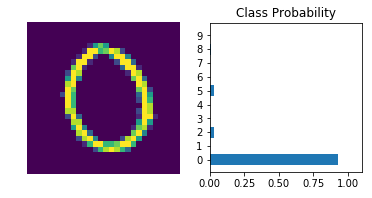

In [53]:
%matplotlib inline
import helper

images, labels = next(iter(dataloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
view_classify(img.view(1, 28, 28), ps)

So then let's move into a complex model, so we are trying to predict over 10 different classes of clothes where also there is more vaiance in the data

In [54]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

0it [00:00, ?it/s]

26427392it [00:01, 14442438.40it/s]                             


Extracting /tmp/.pytorch/F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz


0it [00:00, ?it/s]

32768it [00:00, 92985.86it/s]                            
0it [00:00, ?it/s]

Extracting /tmp/.pytorch/F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz


4423680it [00:01, 4022325.33it/s]                             
0it [00:00, ?it/s]

Extracting /tmp/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 32827.14it/s]            

Extracting /tmp/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [55]:
import torch.nn.functional as F
from torch import optim

class fashionModel(torch.nn.Module):
    def __init__(self,input_d):
        super().__init__()
        self.layer1=torch.nn.Linear(input_d,256)
        self.nivel1Layer1 =torch.nn.Linear(256,80)
        self.nivel1Layer2 =torch.nn.Linear(256,80)
        self.Layer3=torch.nn.Linear(80+80,50)#we will concatenate the output of the 2 previous layers 200,200=400
        self.Layer4=torch.nn.Linear(256+50,34)
        self.outLayer=torch.nn.Linear(34,10)

    
    def forward(self,inputs):
        h1=F.relu(self.layer1(inputs))
        h2_1=F.relu(self.nivel1Layer1(h1))
        h2_2=F.relu(self.nivel1Layer2(h1))
        h3=F.relu(self.Layer3(torch.cat((h2_1,h2_2),dim=1)))
        h4=F.relu(self.Layer4(torch.cat((h3,h1),dim=1)))
        outputs=F.log_softmax(self.outLayer(h4),dim=1)
        return outputs


    def fit(self,batch_generator,num_epochs,criterion,Optimizer=None):
        if not Optimizer:
            Optimizer=optim.Adam(self.parameters(),lr=0.003)
        train_samples=testloader.dataset.data.shape[0]
        print(f"{train_samples} training samples")
        for epoch in range(num_epochs):
            epoch_loss=0
            for images,labels in batch_generator:
                Optimizer.zero_grad()#clean the gradients of the optimizer
                outputs=self.forward(images.view(images.shape[0], -1))
                loss=criterion(outputs,labels)#calculates the loss
                loss.backward()#calculate the gradients of the loss with respect the model parameters
                Optimizer.step()#we update the model parameters
                epoch_loss+=loss.item()
            print(f"EPOCH:{epoch} loss:{epoch_loss}")
                

In [56]:
x = torch.zeros(20,784, requires_grad=False)
print("Test tensor: ",x.shape)
model=fashionModel(784)
out=model(x)
print("Test output:",out.shape)
print("Check if output its ok (sum1):\n",torch.sum(torch.exp(out),dim=1))

Test tensor:  torch.Size([20, 784])
Test output: torch.Size([20, 10])
Check if output its ok (sum1):
 tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000], grad_fn=<SumBackward2>)


In [57]:
criterion = torch.nn.NLLLoss()

In [58]:
model.fit(trainloader,7,criterion)

10000 training samples
EPOCH:0 loss:468.15620647370815
EPOCH:1 loss:362.2424375638366
EPOCH:2 loss:327.61986727267504
EPOCH:3 loss:308.22981045395136
EPOCH:4 loss:295.11384792625904
EPOCH:5 loss:279.3860539570451
EPOCH:6 loss:269.66879001259804


tensor([[7.1442e-03, 8.6397e-08, 5.3701e-06, 2.2564e-05, 1.1616e-05, 3.6781e-06,
         3.2442e-03, 8.9413e-08, 9.8957e-01, 2.0403e-06]],
       grad_fn=<ExpBackward>)


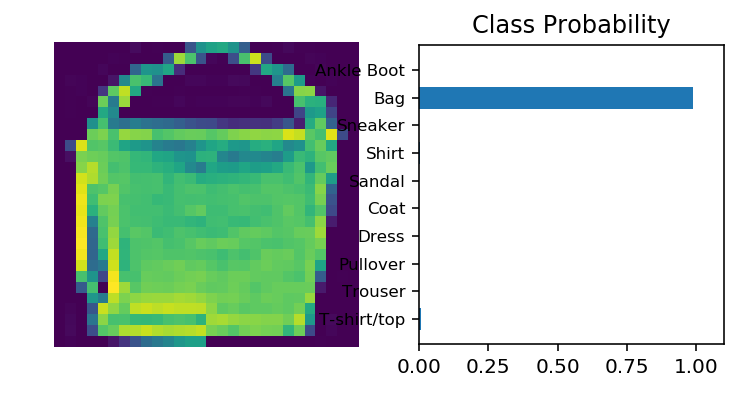

In [59]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
ps=torch.exp(model(img))
print(ps)
# Plot the image and probabilities
view_classify(img.resize_(1, 28, 28), ps, version='Fashion')

In [60]:
pip install hiddenlayer

Note: you may need to restart the kernel to use updated packages.


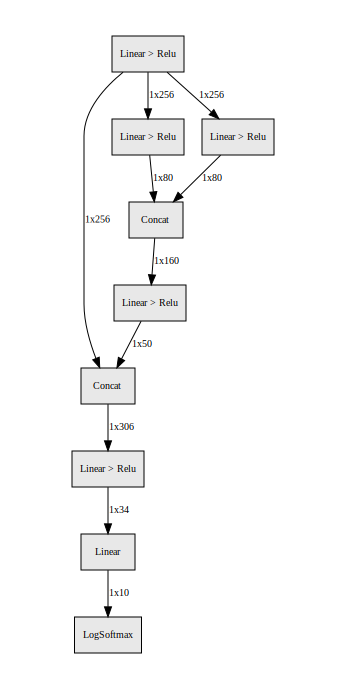

In [61]:
import hiddenlayer as hl
hl.build_graph(model, torch.zeros(1, 784))

## Validation
We also have to validate our models using some matrics in order to know if is generalizing well or  if we have to implement some techniques to improve generalization such as dropout or L regularizations

### Accuracy
we'll calculate the accuracy on our test set for our previous model

In [62]:
dataiter = iter(testloader)
images, labels = dataiter.next()

In [63]:
with torch.no_grad(): #we don't need grads in the predictions so let's speed up this part
    predictions=model(images.view(images.shape[0],-1))
    predictions=torch.exp(predictions)

in order to get the predicted class since our predictions give us a probability for each class we can pickup the highest probability using the method .topk(n,dim) of our prediction tensors, this method returns a tuple (value,index) so for us will be (probability,class) 

In [64]:
probabilities,p_classes=predictions.topk(1,dim=1) #to pickup the top 1 of the row (since each row is a probability vector of the image)

In [65]:
print(p_classes.shape,"\n",p_classes[:10])

torch.Size([64, 1]) 
 tensor([[8],
        [1],
        [9],
        [6],
        [8],
        [2],
        [9],
        [7],
        [7],
        [2]])


In [66]:
print(labels.shape)

torch.Size([64])


then we want two know how many samples have been correctly classified so to perfom == operations p_classes and labels should have the same shapes so we can squeeze p_classes or unsqueeze labels (also view(*p_classes.shape)

In [67]:
equals = p_classes.squeeze(1) == labels

the we just calculate the mean of corectly classified samples
note*: we cast the equals vector to a float vector in order to get a float division and not a integer division

In [68]:
print(f"Accuracy: {torch.mean(equals.type(torch.FloatTensor)).item()*100}")

Accuracy: 90.625


let's implement the validation step in the trainig pass

In [82]:
import torch.nn.functional as F
from torch import optim

class fashionModel(torch.nn.Module):
    def __init__(self,input_d):
        super().__init__()
        self.layer1=torch.nn.Linear(input_d,256)
        self.nivel1Layer1 =torch.nn.Linear(256,80)
        self.nivel1Layer2 =torch.nn.Linear(256,80)
        self.Layer3=torch.nn.Linear(80+80,50)#we will concatenate the output of the 2 previous layers 200,200=400
        self.Layer4=torch.nn.Linear(256+50,34)
        self.outLayer=torch.nn.Linear(34,10)

    
    def forward(self,inputs):
        h1=F.relu(self.layer1(inputs))
        h2_1=F.relu(self.nivel1Layer1(h1))
        h2_2=F.relu(self.nivel1Layer2(h1))
        h3=F.relu(self.Layer3(torch.cat((h2_1,h2_2),dim=1)))
        h4=F.relu(self.Layer4(torch.cat((h3,h1),dim=1)))
        outputs=F.log_softmax(self.outLayer(h4),dim=1)
        return outputs
    
    def accuracy(self,predictions,labels):
        predictions=torch.exp(predictions)#as we have log softmax at the end we need to calculate te actual outputs
        _,predictions=predictions.topk(1,dim=1)
        equals=predictions==labels
        return torch.mean(equals.type(torch.FloatTensor)).item()
    #todo
    def metrics():
        pass
        

    def fit(self,batch_generator,criterion,num_epochs=20,Optimizer=None,validation_generator=None):
        if not Optimizer:
            Optimizer=optim.Adam(self.parameters(),lr=0.003)
        train_batch_size=len(batch_generator)
        train_metrics=[] #(loss,accuracy) size:number of batches
        if validation_generator:
            val_batch_size=len(validation_generator)
            val_metrics=[] #(loss,accuracy) size:number of batches
        for epoch in range(num_epochs):
            epoch_train_loss=0
            epoch_train_accuracy=0
            for images,labels in batch_generator:
                Optimizer.zero_grad()#clean the gradients of the optimizer
                outputs=self.forward(images.view(images.shape[0], -1))
                loss=criterion(outputs,labels)#calculates the loss
                loss.backward()#calculate the gradients of the loss with respect the model parameters
                Optimizer.step()#we update the model parameters
                accuracy=self.accuracy(outputs,labels)
                epoch_train_loss+=loss.item()
                epoch_train_accuracy+=accuracy
            train_metrics.append((epoch_train_loss/train_batch_size,epoch_train_accuracy/train_batch_size))
            print(f"EPOCH:{epoch} Train loss:{train_metrics[-1][0]} Train accuracy:{train_metrics[-1][1]}")
            if validation_generator:
                epoch_val_loss=0
                epoch_val_accuracy=0
                with torch.no_grad():
                    for images_val,labels_val in validation_generator:
                        outputs=self.forward(images_val.view(images_val.shape[0],-1))
                        val_loss=criterion(outputs,labels_val)
                        val_accuracy=self.accuracy(outputs,labels_val)
                        epoch_val_loss+=val_loss.item()
                        epoch_val_accuracy+=val_accuracy
                val_metrics.append((epoch_val_loss/val_batch_size,epoch_val_accuracy/val_batch_size))
                print(f"Validation loss:{val_metrics[-1][0]} Validation accuracy:{val_metrics[-1][1]}")
        if validation_generator:
            return train_metrics,val_metrics
        else:
            return train_metrics

lests train the model remeber we have a batch generator or training called  trainloader and another for validation called testloader

In [83]:
model=fashionModel(784)
criterion = torch.nn.NLLLoss()
train_metrics,val_metrics=model.fit(trainloader,criterion,validation_generator=testloader)

EPOCH:0 Train loss:0.5017297400245025 Train accuracy:0.11080678846281983
Validation loss:0.415632286269194 Validation accuracy:0.1130433295183121
EPOCH:1 Train loss:0.3845716204120915 Train accuracy:0.11152047033248934
Validation loss:0.4205811846597939 Validation accuracy:0.11183662171576433
EPOCH:2 Train loss:0.3482943663178985 Train accuracy:0.1118835579357676
Validation loss:0.4527477362922802 Validation accuracy:0.11205121666003184
EPOCH:3 Train loss:0.32697163893183917 Train accuracy:0.11212613689365672
Validation loss:0.414554745338525 Validation accuracy:0.11186461236066879
EPOCH:4 Train loss:0.31300330909489316 Train accuracy:0.11224430303837953
Validation loss:0.38230481819742046 Validation accuracy:0.11166556777468153
EPOCH:5 Train loss:0.3005038847181716 Train accuracy:0.11224065914845416
Validation loss:0.3854088628557837 Validation accuracy:0.11186772243232485
EPOCH:6 Train loss:0.2881676285489917 Train accuracy:0.11253555395455757
Validation loss:0.37776667354213206 Vali

In [106]:
train_loss,train_accuracy = zip(*train_metrics)
val_loss,val_accuracy = zip(*val_metrics)

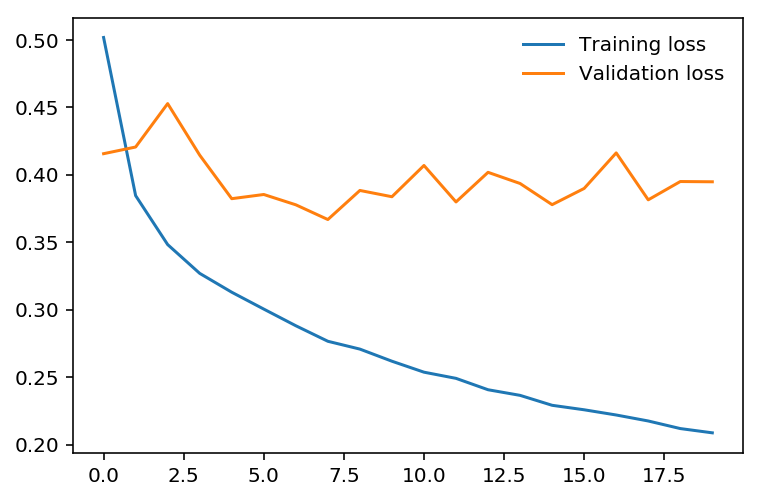

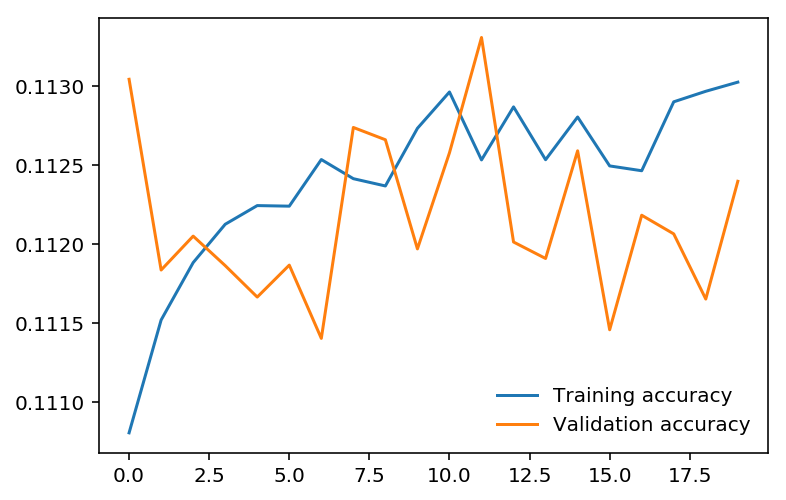

In [112]:
import matplotlib.pyplot as plt
plt.plot(train_loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.legend(frameon=False)
plt.show()
plt.plot(train_accuracy, label='Training accuracy')
plt.plot(val_accuracy, label='Validation accuracy')
plt.legend(frameon=False)
plt.show()

As we can see there is a serious overfitting in the model let's try to use some generalization techniques to improve the perfomance of the model